#📌 Extracción

In [49]:
import pandas as pd
import requests
import os # Import the os module

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# 1. Descarga el JSON
resp = requests.get(url)
resp.raise_for_status()
data = resp.json()

# 2. Aplana las columnas anidadas directamente
df = pd.json_normalize(
    data,
    sep="_"   # usa "_" como separador para que quede claro
)

# 3. Normaliza nombres de columnas
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace("-", "_")
)

# 4. Crear flag de churn (target binario)
df["churn_flag"] = df["churn"].map({"Yes": 1, "No": 0}).astype("Int64")

# 5. Guardar copia
# Create the directory if it doesn't exist
os.makedirs("data/interim", exist_ok=True)
df.to_csv("data/interim/telecomx_clean.csv", index=False, encoding="utf-8")

print(df.shape)
df.head()

(7267, 22)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,churn_flag
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,1


#🔧 Transformación

# 1. Resumen general: filas, columnas, tipos de datos, nulos

In [50]:
import pandas as pd

# Cargamos el dataset ya aplanado
df = pd.read_csv("data/interim/telecomx_clean.csv")

# 1. Resumen general: filas, columnas, tipos de datos, nulos
print("=== Info del DataFrame ===")
df.info()

=== Info del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport 

# 2. Tipos de datos resumidos

In [51]:
# 2. Tipos de datos resumidos
print("\n=== Tipos de datos únicos ===")
print(df.dtypes.value_counts())


=== Tipos de datos únicos ===
object     18
int64       2
float64     2
Name: count, dtype: int64


# 3. Primeras filas

In [52]:
print("\n=== Ejemplo de registros ===")
display(df.head(5))


=== Ejemplo de registros ===


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,churn_flag
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,1.0


# 4. Estadísticas básicas numéricas

In [53]:
print("\n=== Estadísticas básicas ===")
display(df.describe().T)



=== Estadísticas básicas ===


,count,mean,std,min,25%,50%,75%,max
customer_seniorcitizen,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00
customer_tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
account_charges_monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75
churn_flag,7043.0,0.265370,0.441561,0.00,0.000,0.0,1.000,1.00


# 5. Valores únicos por columna categórica

In [54]:
print("\n=== Valores únicos por columna categórica ===")
for col in df.select_dtypes(include="object").columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False).head(10))


=== Valores únicos por columna categórica ===

Columna: customerid
customerid
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
9967-ATRFS    1
9966-VYRTZ    1
9965-YOKZB    1
9964-WBQDJ    1
9962-BFPDU    1
Name: count, dtype: int64

Columna: churn
churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64

Columna: customer_gender
customer_gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: customer_partner
customer_partner
No     3749
Yes    3518
Name: count, dtype: int64

Columna: customer_dependents
customer_dependents
No     5086
Yes    2181
Name: count, dtype: int64

Columna: phone_phoneservice
phone_phoneservice
Yes    6560
No      707
Name: count, dtype: int64

Columna: phone_multiplelines
phone_multiplelines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Columna: internet_internetservice
internet_internetservice
Fiber optic    3198
DSL            2488
No        

# comprobación de incoherencias

In [55]:
import pandas as pd
import numpy as np
from pathlib import Path

Path("data/processed").mkdir(parents=True, exist_ok=True)

df = pd.read_csv("data/interim/telecomx_clean.csv")

def pct(x):
    return (100*x).round(2)


# Espacios, mayúsculas y categorías inconsistentes

In [56]:
obj_cols = df.select_dtypes(include="object").columns

# strip + normalizar espacios internos
for c in obj_cols:
    df[c] = df[c].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)

# estandarizar Yes/No/True/False
yn_map = {"yes":"Yes", "no":"No", "true":"Yes", "false":"No", "nan":"NaN"}
for c in obj_cols:
    uniques = df[c].str.lower().unique()
    if set(uniques) <= set(yn_map.keys()) | {"no phone service", "no internet service"}:
        df[c] = df[c].str.lower().map(yn_map).fillna(df[c])

# Contrato y método de pago a “título” consistente
for c in [col for col in obj_cols if any(k in col for k in ["contract","paymentmethod","internet_internetservice"])]:
    df[c] = df[c].str.title()

# Duplicados

In [57]:
id_col = next((c for c in df.columns if c.lower()=="customerid"), None)
dup_count = df.duplicated(subset=[id_col]).sum() if id_col else df.duplicated().sum()
print("Duplicados:", dup_count)

# Si quieres eliminarlos (mantén el primero):
if dup_count:
    df = df.drop_duplicates(subset=[id_col] if id_col else None, keep="first")


Duplicados: 0


#Nulos: conteo y porcentaje

In [58]:
null_table = (pd.DataFrame({
    "nulos": df.isna().sum(),
    "%": pct(df.isna().mean()*100)
})
 .sort_values(["%", "nulos"], ascending=False))
null_table.head(20)

,nulos,%
churn_flag,224,308.24
customerid,0,0.00
churn,0,0.00
customer_gender,0,0.00
customer_seniorcitizen,0,0.00
customer_partner,0,0.00
customer_dependents,0,0.00
customer_tenure,0,0.00
phone_phoneservice,0,0.00
phone_multiplelines,0,0.00


# Tipos numéricos y conversiones

In [59]:
# columnas candidatas a numéricas
num_candidates = [c for c in df.columns if any(k in c.lower() for k in ["tenure","charges","total","monthly","seniorcitizen"])]

for c in num_candidates:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df[num_candidates].describe().T


,count,mean,std,min,25%,50%,75%,max
customer_seniorcitizen,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00
customer_tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
account_charges_monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75
account_charges_total,7256.0,2280.634213,2268.632997,18.80,400.225,1391.0,3785.300,8684.80


In [60]:
issues = {}

issues["tenure_negativos"] = df.query("customer_tenure < 0").shape[0]
issues["monthly_negativos"] = df.query("account_charges_monthly < 0").shape[0]
issues["total_negativos"] = df.query("account_charges_total < 0").shape[0]

issues


{'tenure_negativos': 0, 'monthly_negativos': 0, 'total_negativos': 0}

In [61]:
# Flags de servicio base
has_internet = df["internet_internetservice"].str.lower().ne("no internet service")
has_phone    = df["phone_phoneservice"].str.lower().eq("yes")

internet_addons = [c for c in df.columns if c.startswith("internet_") and c not in ["internet_internetservice"]]
phone_addons    = [c for c in df.columns if c.startswith("phone_") and c != "phone_phoneservice"]

# Contar inconsistencias internet: addon==Yes pero no hay internet
bad_internet = 0
for c in internet_addons:
    if df[c].dtype == "object":
        bad_internet += df[(~has_internet) & (df[c].str.lower()=="yes")].shape[0]
    else:
        bad_internet += df[(~has_internet) & (df[c]==1)].shape[0]

# Inconsistencias phone: multiple lines==Yes pero no hay phone
bad_phone = 0
for c in phone_addons:
    if "multiplelines" in c:
        if df[c].dtype == "object":
            bad_phone += df[(~has_phone) & (df[c].str.lower()=="yes")].shape[0]
        else:
            bad_phone += df[(~has_phone) & (df[c]==1)].shape[0]

{"inconsistencias_internet": bad_internet, "inconsistencias_phone": bad_phone}


{'inconsistencias_internet': 0, 'inconsistencias_phone': 0}

In [62]:
# Corrección opcional
for c in internet_addons:
    if df[c].dtype == "object":
        df.loc[~has_internet, c] = "No"
    else:
        df.loc[~has_internet, c] = 0

for c in phone_addons:
    if "multiplelines" in c:
        if df[c].dtype == "object":
            df.loc[~has_phone, c] = "No"
        else:
            df.loc[~has_phone, c] = 0

In [63]:
if "churn_flag" not in df.columns:
    df["churn_flag"] = df["churn"].map({"Yes":1, "No":0}).astype("Int64")

df["churn"].value_counts(dropna=False), df["churn_flag"].value_counts(dropna=False)


(churn
 No     5174
 Yes    1869
 NaN     224
 Name: count, dtype: int64,
 churn_flag
 0.0    5174
 1.0    1869
 NaN     224
 Name: count, dtype: int64)

In [64]:
df.to_parquet("data/processed/telecomx_checked.parquet", index=False)
df.to_csv("data/processed/telecomx_checked.csv", index=False, encoding="utf-8")
print("Guardado en data/processed/")

Guardado en data/processed/


# correccion de inconsistencias

In [65]:
import pandas as pd

df = pd.read_csv("data/processed/telecomx_checked.csv")

# 1. Estandarizar valores binarios Yes/No
binary_cols = [c for c in df.columns if df[c].dtype == "object"]
for col in binary_cols:
    uniques = df[col].dropna().astype(str).str.lower().unique()
    if set(uniques) <= {"yes","no","nan","no internet service","no phone service"}:
        df[col] = df[col].str.strip().str.lower()
        df[col] = df[col].replace({
            "yes":"Yes",
            "no":"No",
            "no internet service":"No Internet Service",
            "no phone service":"No Phone Service"
        })

# 2. Rellenar valores nulos lógicos
# Charges.Total puede ser NaN si tenure=0 => ponemos 0
df.loc[(df["customer_tenure"]==0) & (df["account_charges_total"].isna()), "account_charges_total"] = 0

# MonthlyCharges: si está vacío, ponemos 0
df["account_charges_monthly"] = df["account_charges_monthly"].fillna(0)

# 3. Inconsistencias en InternetService
addons_internet = [c for c in df.columns if c.startswith("internet_") and c not in ["internet_internetservice"]]
mask_no_internet = df["internet_internetservice"].str.lower() == "no internet service"

for c in addons_internet:
    df.loc[mask_no_internet, c] = "No"

# 4. Inconsistencias en PhoneService
if "phone_phoneservice" in df.columns and "phone_multiplelines" in df.columns:
    mask_no_phone = df["phone_phoneservice"].str.lower() == "no"
    df.loc[mask_no_phone, "phone_multiplelines"] = "No Phone Service"

# 5. Quitar duplicados (si hubiera)
id_col = next((c for c in df.columns if c.lower()=="customerid"), None)
if id_col:
    df = df.drop_duplicates(subset=[id_col], keep="first")

# 6. Normalizar PaymentMethod y Contract (capitalizar bien)
if "account_paymentmethod" in df.columns:
    df["account_paymentmethod"] = df["account_paymentmethod"].str.title()

if "account_contract" in df.columns:
    df["account_contract"] = df["account_contract"].str.title()

# 7. Asegurar tipos numéricos
num_cols = ["customer_tenure","account_charges_monthly","account_charges_total"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# 8. Verificación final
print("Nulos restantes:\n", df.isna().sum()[df.isna().sum()>0])
print("\nValores únicos en Contract:", df["account_contract"].unique())
print("\nValores únicos en InternetService:", df["internet_internetservice"].unique())

# 9. Guardar dataset limpio
df.to_csv("data/processed/telecomx_clean_final.csv", index=False, encoding="utf-8")
df.to_parquet("data/processed/telecomx_clean_final.parquet", index=False)

print("✅ Dataset limpio guardado en data/processed/")


Nulos restantes:
 churn         224
churn_flag    224
dtype: int64

Valores únicos en Contract: ['One Year' 'Month-To-Month' 'Two Year']

Valores únicos en InternetService: ['Dsl' 'Fiber Optic' 'No']
✅ Dataset limpio guardado en data/processed/


#columna de cuentas diarias

In [66]:
import pandas as pd

# Cargar el dataset limpio
df = pd.read_csv("data/processed/telecomx_clean_final.csv")

# Crear la columna Cuentas_Diarias
df["cuentas_diarias"] = df["account_charges_monthly"] / 30

# Verificar
print(df[["account_charges_monthly", "cuentas_diarias"]].head())

# Guardar nuevamente el dataset actualizado
df.to_csv("data/processed/telecomx_with_cuentas_diarias.csv", index=False, encoding="utf-8")
df.to_parquet("data/processed/telecomx_with_cuentas_diarias.parquet", index=False)

print("✅ Columna 'cuentas_diarias' creada y dataset guardado.")


   account_charges_monthly  cuentas_diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667
✅ Columna 'cuentas_diarias' creada y dataset guardado.


Paso 1: Convertir Yes/No a valores binarios (1/0)

In [67]:
import pandas as pd

df = pd.read_csv("data/processed/telecomx_with_cuentas_diarias.csv")

# Mapear todas las columnas binarias Yes/No a 1/0
yn_map = {"Yes": 1, "No": 0}

binary_cols = []
for col in df.columns:
    uniques = df[col].dropna().unique()
    if set(uniques) <= {"Yes","No"}:
        df[col] = df[col].map(yn_map).astype("Int64")
        binary_cols.append(col)

print("Columnas convertidas a 0/1:", binary_cols[:10])


Columnas convertidas a 0/1: ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'account_paperlessbilling']


🔧 Paso 2: Estandarizar columnas categóricas

In [68]:
cat_cols = ["account_contract", "account_paymentmethod", "internet_internetservice"]

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()
        print(f"{col} → {df[col].unique()}")


account_contract → ['One Year' 'Month-To-Month' 'Two Year']
account_paymentmethod → ['Mailed Check' 'Electronic Check' 'Credit Card (Automatic)'
 'Bank Transfer (Automatic)']
internet_internetservice → ['Dsl' 'Fiber Optic' 'No']


Paso 3: Renombrar columnas para mayor claridad

In [69]:
df = df.rename(columns={
    "account_charges_monthly": "monthly_charges",
    "account_charges_total": "total_charges",
    "customer_tenure": "tenure_months",
    "cuentas_diarias": "daily_charges"
})

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ["monthly_charges", "total_charges", "daily_charges", "tenure_months"]

df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

df_scaled[num_cols].head()


,monthly_charges,total_charges,daily_charges,tenure_months
0,0.471144,0.068315,0.471144,0.125000
1,0.414428,0.062454,0.414428,0.125000
2,0.553731,0.032338,0.553731,0.055556
3,0.793532,0.142531,0.793532,0.180556
4,0.653234,0.030789,0.653234,0.041667


In [71]:
df.to_csv("data/processed/telecomx_final.csv", index=False, encoding="utf-8")
df.to_parquet("data/processed/telecomx_final.parquet", index=False)

# df_scaled.to_csv("data/processed/telecomx_final_scaled.csv", index=False, encoding="utf-8")

print("✅ Dataset estandarizado y guardado.")

✅ Dataset estandarizado y guardado.


#preparación de los datos

## Eliminación de Columnas Irrelevantes

In [72]:
import pandas as pd

# Cargar dataset procesado
df = pd.read_csv("data/processed/telecomx_final.csv")

# Revisar columnas
print("Columnas actuales:", df.columns.tolist())

# Eliminar columnas irrelevantes
cols_to_drop = ["customerid"]  # Corrected column name
df = df.drop(columns=cols_to_drop)

# Guardar nuevamente el dataset limpio
df.to_csv("data/processed/telecomx_final_clean.csv", index=False, encoding="utf-8")
df.to_parquet("data/processed/telecomx_final_clean.parquet", index=False)

print("✅ Columnas irrelevantes eliminadas y dataset guardado.")

Columnas actuales: ['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen', 'customer_partner', 'customer_dependents', 'tenure_months', 'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice', 'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies', 'account_contract', 'account_paperlessbilling', 'account_paymentmethod', 'monthly_charges', 'total_charges', 'churn_flag', 'daily_charges']
✅ Columnas irrelevantes eliminadas y dataset guardado.


## Encoding

In [73]:
# Ver los tipos de datos
print(df.dtypes)

# Filtrar solo las categóricas
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Columnas categóricas:", categorical_cols)

churn                        float64
customer_gender               object
customer_seniorcitizen         int64
customer_partner               int64
customer_dependents            int64
tenure_months                  int64
phone_phoneservice             int64
phone_multiplelines           object
internet_internetservice      object
internet_onlinesecurity       object
internet_onlinebackup         object
internet_deviceprotection     object
internet_techsupport          object
internet_streamingtv          object
internet_streamingmovies      object
account_contract              object
account_paperlessbilling       int64
account_paymentmethod         object
monthly_charges              float64
total_charges                float64
churn_flag                   float64
daily_charges                float64
dtype: object
Columnas categóricas: ['customer_gender', 'phone_multiplelines', 'internet_internetservice', 'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection'

In [74]:
# Ver valores únicos de todas las columnas categóricas
for col in df.select_dtypes(include=["object"]).columns:
    print(f"--- {col} ---")
    print(df[col].unique())
    print("\n")

--- customer_gender ---
['Female' 'Male']


--- phone_multiplelines ---
['No' 'Yes' 'No Phone Service']


--- internet_internetservice ---
['Dsl' 'Fiber Optic' 'No']


--- internet_onlinesecurity ---
['No' 'Yes' 'No Internet Service']


--- internet_onlinebackup ---
['Yes' 'No' 'No Internet Service']


--- internet_deviceprotection ---
['No' 'Yes' 'No Internet Service']


--- internet_techsupport ---
['Yes' 'No' 'No Internet Service']


--- internet_streamingtv ---
['Yes' 'No' 'No Internet Service']


--- internet_streamingmovies ---
['No' 'Yes' 'No Internet Service']


--- account_contract ---
['One Year' 'Month-To-Month' 'Two Year']


--- account_paymentmethod ---
['Mailed Check' 'Electronic Check' 'Credit Card (Automatic)'
 'Bank Transfer (Automatic)']




In [75]:
# Seleccionar las columnas categóricas
categorical_cols = [
    "customer_gender",
    "phone_multiplelines",
    "internet_internetservice",
    "internet_onlinesecurity",
    "internet_onlinebackup",
    "internet_deviceprotection",
    "internet_techsupport",
    "internet_streamingtv",
    "internet_streamingmovies",
    "account_contract",
    "account_paymentmethod"
]

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Guardar dataset procesado
df_encoded.to_csv("data/processed/telecomx_encoded.csv", index=False, encoding="utf-8")
df_encoded.to_parquet("data/processed/telecomx_encoded.parquet", index=False)

print("✅ Encoding aplicado y dataset guardado.")

✅ Encoding aplicado y dataset guardado.


Verificación de la Proporción de Cancelación (Churn)

=== Distribución de Churn ===
churn_flag
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


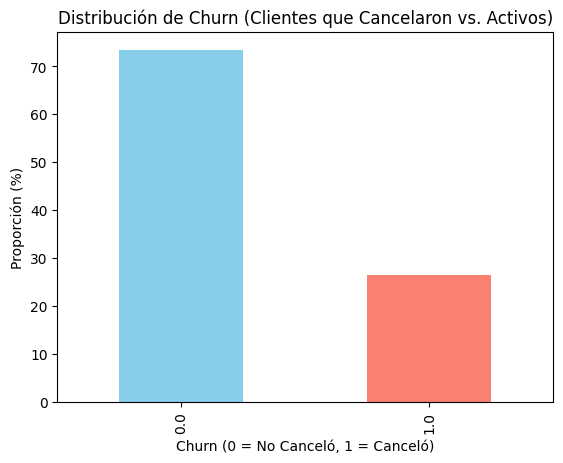

In [76]:
# Verificar proporción de Churn
churn_distribution = df["churn_flag"].value_counts(normalize=True) * 100

print("=== Distribución de Churn ===")
print(churn_distribution)

# También en gráfico
import matplotlib.pyplot as plt

churn_distribution.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribución de Churn (Clientes que Cancelaron vs. Activos)")
plt.xlabel("Churn (0 = No Canceló, 1 = Canceló)")
plt.ylabel("Proporción (%)")
plt.show()

Balanceo de Clases

In [79]:
# If falta: pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from pathlib import Path

# 1) Cargar dataset ya codificado (one-hot) y limpio
df = pd.read_csv("/content/data/processed/telecomx_encoded.csv")

# Drop rows with missing churn_flag
df.dropna(subset=["churn_flag"], inplace=True)

# 2) Separar features y target
y = df["churn_flag"]
X = df.drop(columns=["churn_flag"])

# 3) Split estratificado (mantiene proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Distribución original (train):", Counter(y_train))
print("Distribución original (test) :", Counter(y_test))

# 4) Aplicar SMOTE SOLO al conjunto de entrenamiento
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Distribución tras SMOTE (train):", Counter(y_train_sm))

# 5) (Opcional) Guardar conjuntos balanceados
out = Path("data/processed")
out.mkdir(parents=True, exist_ok=True)
X_train_sm.to_csv(out / "X_train_smote.csv", index=False)
y_train_sm.to_csv(out / "y_train_smote.csv", index=False)
X_test.to_csv(out / "X_test.csv", index=False)
y_test.to_csv(out / "y_test.csv", index=False)

print("✅ SMOTE aplicado al train y datasets guardados en data/processed/")

Distribución original (train): Counter({0.0: 4139, 1.0: 1495})
Distribución original (test) : Counter({0.0: 1035, 1.0: 374})
Distribución tras SMOTE (train): Counter({0.0: 4139, 1.0: 4139})
✅ SMOTE aplicado al train y datasets guardados en data/processed/


## Normalización o Estandarización (si es necesario)

In [81]:
import pandas as pd
import numpy as np

# === 1) Cargar el dataset listo para modelar (ya con encoding) ===
df = pd.read_csv("/content/data/processed/telecomx_encoded.csv")

# === 2) Separar target y features ===
y = df["churn_flag"]
X = df.drop(columns=["churn_flag"])

# === 3) Detectar columnas numéricas y separar binarias (0/1) de contínuas ===
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# binarias: 2 valores únicos (p. ej., dummies)
binary_cols = [c for c in num_cols if X[c].nunique(dropna=True) <= 2]
# continuas: resto
cont_cols = [c for c in num_cols if c not in binary_cols]

print(f"Numéricas totales: {len(num_cols)} | Binarias: {len(binary_cols)} | Continuas: {len(cont_cols)}")

# === 4) Resumen de escala para continuas ===
def summarize_scale(df_cont):
    desc = df_cont.agg(["count","mean","std","min","max"]).T
    desc["range"] = desc["max"] - desc["min"]
    desc["coef_var"] = (desc["std"] / (desc["mean"].replace(0, np.nan))).abs()
    desc["skew"] = df_cont.skew()
    desc["kurt"] = df_cont.kurt()
    return desc.sort_values("range", ascending=False)

scale_summary = summarize_scale(X[cont_cols]) if cont_cols else pd.DataFrame()
display(scale_summary)

# === 5) Heurísticas de decisión ===
reasons = []

# 5.1 diferencia de órdenes de magnitud entre escalas
if not scale_summary.empty:
    max_range = scale_summary["range"].max()
    min_range = scale_summary["range"].replace(0, np.nan).min()
    if pd.notna(min_range) and (max_range / max(1e-9, min_range)) >= 10:
        reasons.append("hay diferencias ≥10x entre rangos de variables continuas")

# 5.2 desbalance de varianzas (coeficiente de variación)
if (scale_summary["coef_var"].replace([np.inf, -np.inf], np.nan).dropna() > 1.5).any():
    reasons.append("algunas variables tienen alta variación relativa (coef_var > 1.5)")

# 5.3 asimetría fuerte → podría convenir transformar (log) antes de estandarizar
if (scale_summary["skew"].abs() > 1.0).any():
    reasons.append("distribuciones muy asimétricas (|skew| > 1) — considerar log/Box-Cox previo")

# 5.4 proporción de binarias vs. continuas (si casi todo es 0/1, escalar aporta poco)
if len(cont_cols) <= len(binary_cols) * 0.25:
    reasons.append("predominan variables binarias; el escalado afectará poco al conjunto")

print("\n=== Diagnóstico ===")
if reasons:
    for r in reasons: print("•", r)
else:
    print("• No se detectaron señales fuertes que obliguen a escalar por la propia data.")

# === 6) Recomendación según tipo de modelo (guía rápida) ===
print("\n=== Guía por tipo de modelo ===")
print("- KNN / SVM / Redes Neuronales: RECOMENDADO estandarizar (StandardScaler).")
print("- Regresión Logística con regularización: recomendable estandarizar.")
print("- Árboles / Random Forest / XGBoost: NO sensible a escala (no es necesario).")

# === 7) Sugerencia final automática ===
need_scaling = False
if reasons and any("≥10x" in r or "coef_var" in r for r in reasons):
    need_scaling = True

print("\n=== Sugerencia automática ===")
print("Estandarizar (StandardScaler)." if need_scaling else "Escalado opcional; según el modelo que elijas.")

Numéricas totales: 10 | Binarias: 6 | Continuas: 4


,count,mean,std,min,max,range,coef_var,skew,kurt
total_charges,7267.0,2277.182035,2268.648587,0.000000,8684.800000,8684.80,0.996253,0.965766,-0.227330
monthly_charges,7267.0,64.720098,30.129572,18.250000,118.750000,100.50,0.465537,-0.216539,-1.261512
tenure_months,7267.0,32.346498,24.571773,0.000000,72.000000,72.00,0.759642,0.239523,-1.388981
daily_charges,7267.0,2.157337,1.004319,0.608333,3.958333,3.35,0.465537,-0.216539,-1.261512



=== Diagnóstico ===
• hay diferencias ≥10x entre rangos de variables continuas

=== Guía por tipo de modelo ===
- KNN / SVM / Redes Neuronales: RECOMENDADO estandarizar (StandardScaler).
- Regresión Logística con regularización: recomendable estandarizar.
- Árboles / Random Forest / XGBoost: NO sensible a escala (no es necesario).

=== Sugerencia automática ===
Estandarizar (StandardScaler).


In [82]:
from sklearn.preprocessing import StandardScaler

# === 1) Separar continuas y binarias ===
cont_cols = ["total_charges", "monthly_charges", "tenure_months", "daily_charges"]
binary_cols = [c for c in X.columns if c not in cont_cols]

# === 2) Estandarizar solo las continuas ===
scaler = StandardScaler()
X_scaled_cont = scaler.fit_transform(X[cont_cols])
X_scaled_cont = pd.DataFrame(X_scaled_cont, columns=cont_cols, index=X.index)

# === 3) Reconstruir dataset con continuas escaladas + binarias intactas ===
X_final = pd.concat([X_scaled_cont, X[binary_cols]], axis=1)
df_final = pd.concat([X_final, y], axis=1)

# === 4) Guardar datasets procesados ===
df_final.to_csv("data/processed/telecomx_final_scaled.csv", index=False, encoding="utf-8")
df_final.to_parquet("data/processed/telecomx_final_scaled.parquet", index=False)

print("✅ Dataset con variables continuas estandarizadas guardado.")

✅ Dataset con variables continuas estandarizadas guardado.


# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

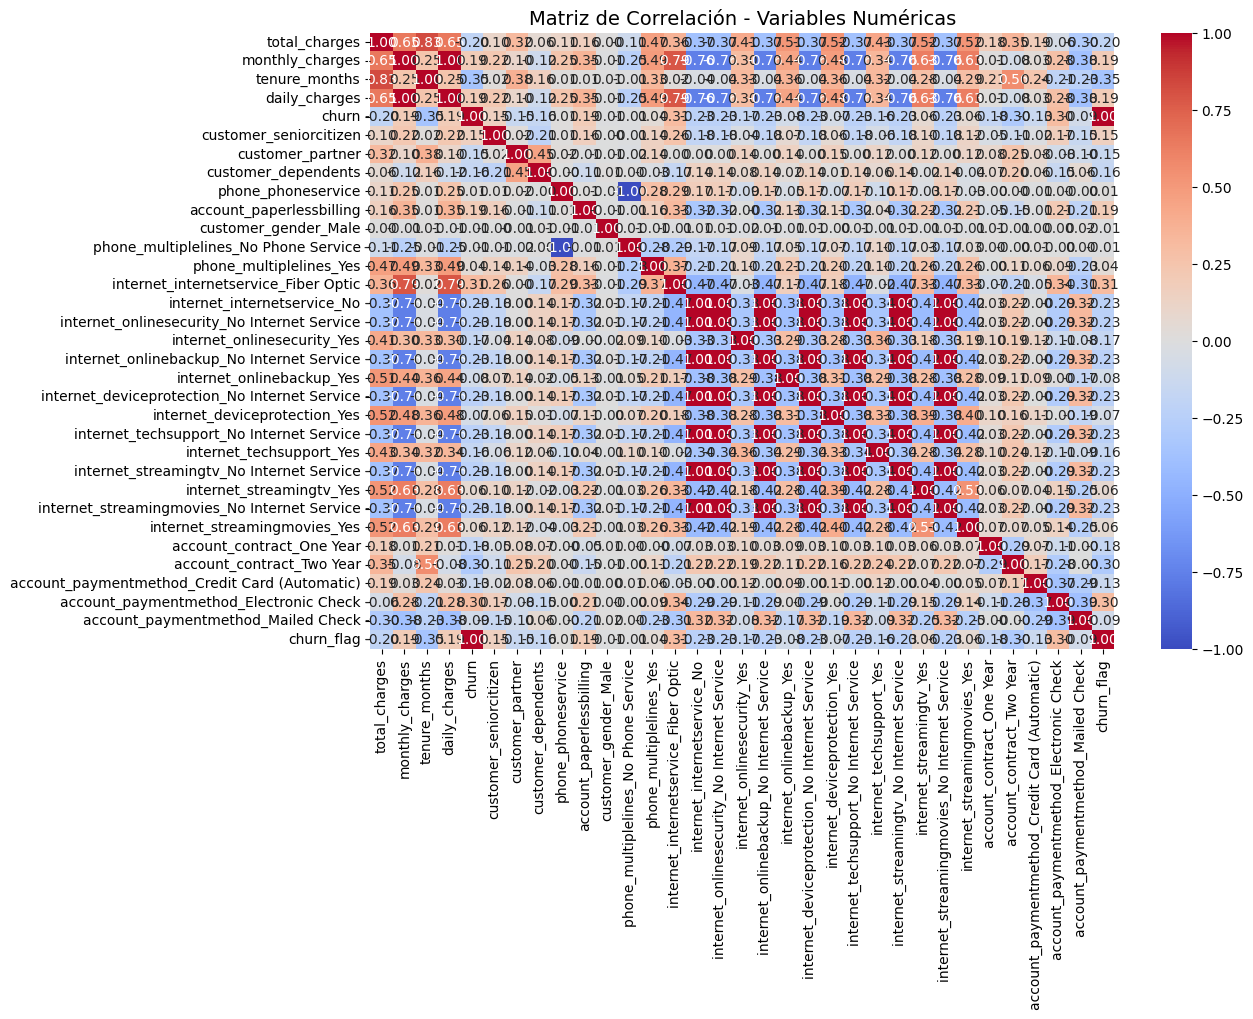

📊 Correlación de las variables con churn_flag:

churn                                            1.000000
churn_flag                                       1.000000
internet_internetservice_Fiber Optic             0.308020
account_paymentmethod_Electronic Check           0.301919
daily_charges                                    0.193356
monthly_charges                                  0.193356
account_paperlessbilling                         0.191825
customer_seniorcitizen                           0.150889
internet_streamingtv_Yes                         0.063228
internet_streamingmovies_Yes                     0.061382
phone_multiplelines_Yes                          0.040102
phone_phoneservice                               0.011942
customer_gender_Male                            -0.008612
phone_multiplelines_No Phone Service            -0.011942
internet_deviceprotection_Yes                   -0.066160
internet_onlinebackup_Yes                       -0.082255
account_paymentmethod_Ma

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# === 1) Calcular matriz de correlación ===
corr_matrix = df_final.corr()

# === 2) Visualizar heatmap completo ===
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de Correlación - Variables Numéricas", fontsize=14)
plt.show()

# === 3) Enfocarse en la relación con la variable target (churn_flag) ===
corr_target = corr_matrix["churn_flag"].sort_values(ascending=False)
print("📊 Correlación de las variables con churn_flag:\n")
print(corr_target)

## Análisis Dirigido

/tmp/ipython-input-1584988482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn_flag", y="tenure_months", data=df, palette="Set2")


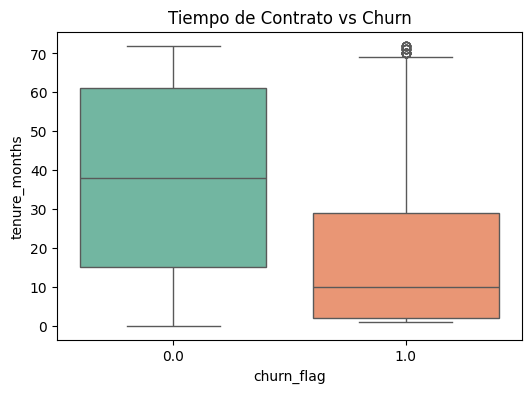

/tmp/ipython-input-1584988482.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn_flag", y="total_charges", data=df, palette="Set1")


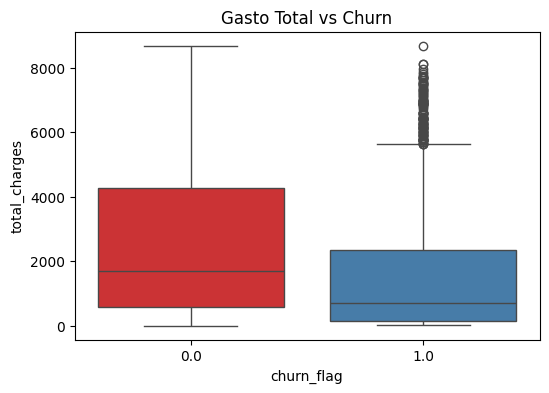

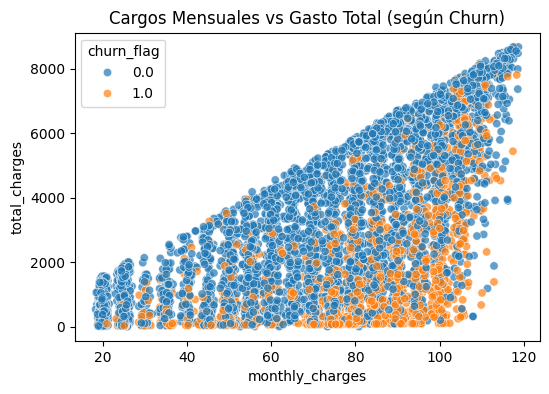

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot tiempo de contrato vs churn
plt.figure(figsize=(6,4))
sns.boxplot(x="churn_flag", y="tenure_months", data=df, palette="Set2")
plt.title("Tiempo de Contrato vs Churn")
plt.show()

# Boxplot gasto total vs churn
plt.figure(figsize=(6,4))
sns.boxplot(x="churn_flag", y="total_charges", data=df, palette="Set1")
plt.title("Gasto Total vs Churn")
plt.show()

# Scatter plot gasto mensual vs churn
plt.figure(figsize=(6,4))
sns.scatterplot(x="monthly_charges", y="total_charges", hue="churn_flag", data=df, alpha=0.7)
plt.title("Cargos Mensuales vs Gasto Total (según Churn)")
plt.show()


# 🤖 Modelado Predictivo

## Separación de Datos

In [86]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv("data/processed/telecomx_final_scaled.csv")

# Drop rows with missing churn_flag
df.dropna(subset=["churn_flag"], inplace=True)


# Definimos X (variables predictoras) e y (variable objetivo)
X = df.drop("churn_flag", axis=1)  # Todas las columnas excepto churn_flag
y = df["churn_flag"]               # Variable objetivo

# División en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("✅ Datos separados correctamente:")
print(f"Conjunto de entrenamiento: {X_train.shape[0]} registros")
print(f"Conjunto de prueba: {X_test.shape[0]} registros")

✅ Datos separados correctamente:
Conjunto de entrenamiento: 4930 registros
Conjunto de prueba: 2113 registros


# Creación de Modelos

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# ======================
# Modelo 1: Regresión Logística (requiere normalización)
# ======================
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),        # Normalización
    ('logreg', LogisticRegression(random_state=42))
])

pipeline_logreg.fit(X_train, y_train)
y_pred_logreg = pipeline_logreg.predict(X_test)

print("📊 Resultados - Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_logreg))


# ======================
# Modelo 2: Random Forest (NO requiere normalización)
# ======================
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n📊 Resultados - Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

📊 Resultados - Regresión Logística
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1552
         1.0       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

Matriz de confusión:
 [[1552    0]
 [   0  561]]

📊 Resultados - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1552
         1.0       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

Matriz de confusión:
 [[1552    0]
 [   0  561]]


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score # Import roc_auc_score


# Create the pipeline for KNN
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])


param_grid = {
    "knn__n_neighbors": [3,5,7,9,11,15,21],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2],  # Manhattan (1) vs Euclidiana (2)
}

grid = GridSearchCV(pipe_knn, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejor combinación:", grid.best_params_)
print("Mejor F1 (cv):", grid.best_score_)

# Re-evaluar en test con el mejor modelo
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]
print("\n📊 KNN (mejorado)")
print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Mejor combinación: {'knn__n_neighbors': 11, 'knn__p': 2, 'knn__weights': 'distance'}
Mejor F1 (cv): 0.9578098972809878

📊 KNN (mejorado)
              precision    recall  f1-score   support

         0.0      0.969     0.999     0.984      1552
         1.0      0.996     0.911     0.952       561

    accuracy                          0.975      2113
   macro avg      0.982     0.955     0.968      2113
weighted avg      0.976     0.975     0.975      2113

ROC-AUC: 0.9930634038995169


Análisis de la Importancia de las Variables

1. Regresión Logística

In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Reentrenamos el modelo logístico con los mismos datos
log_reg = LogisticRegression(max_iter=500, solver="lbfgs")
log_reg.fit(X_train, y_train)

# Extraer coeficientes
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_reg.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

print("📊 Importancia de variables (Regresión Logística):")
print(coef_df.head(15))   # las 15 más influyentes


📊 Importancia de variables (Regresión Logística):
                                         Variable  Coeficiente
4                                           churn    10.185003
30         account_paymentmethod_Electronic Check     0.248618
9                        account_paperlessbilling     0.180958
13           internet_internetservice_Fiber Optic     0.148959
1                                 monthly_charges     0.144948
3                                   daily_charges     0.144948
5                          customer_seniorcitizen     0.124354
31             account_paymentmethod_Mailed Check     0.088990
12                        phone_multiplelines_Yes     0.088968
29  account_paymentmethod_Credit Card (Automatic)     0.051649
11           phone_multiplelines_No Phone Service     0.047618
26                   internet_streamingmovies_Yes     0.033376
24                       internet_streamingtv_Yes     0.020297
0                                   total_charges    -0.017376
6    

2. KNN

In [92]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import pandas as pd

# Usamos el mejor modelo KNN entrenado (best_knn from the previous cell)
# Access the KNeighborsClassifier estimator from the pipeline
knn_estimator = best_knn.named_steps['knn']

result = permutation_importance(knn_estimator, best_knn.named_steps['scaler'].transform(X_test), y_test,
                                n_repeats=10, random_state=42, scoring="f1")

knn_importance = pd.DataFrame({
    "Variable": X_test.columns,
    "Importancia": result.importances_mean
}).sort_values(by="Importancia", ascending=False)

print("📊 Importancia de variables (KNN – Permutation Importance):")
print(knn_importance.head(15))

📊 Importancia de variables (KNN – Permutation Importance):
                                         Variable  Importancia
4                                           churn     0.651078
13           internet_internetservice_Fiber Optic     0.004118
3                                   daily_charges     0.003814
1                                 monthly_charges     0.003814
2                                   tenure_months     0.002518
12                        phone_multiplelines_Yes     0.001465
28                      account_contract_Two Year     0.000688
14                    internet_internetservice_No     0.000000
19  internet_deviceprotection_No Internet Service     0.000000
23       internet_streamingtv_No Internet Service     0.000000
21       internet_techsupport_No Internet Service     0.000000
25   internet_streamingmovies_No Internet Service     0.000000
17      internet_onlinebackup_No Internet Service     0.000000
15    internet_onlinesecurity_No Internet Service     0.000

Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("📊 Importancia de variables (Random Forest):")
print(rf_importance.head(15))

📊 Importancia de variables (Random Forest):
                                    Variable  Importancia
4                                      churn     0.681172
2                              tenure_months     0.050782
0                              total_charges     0.049970
3                              daily_charges     0.027529
1                            monthly_charges     0.026139
28                 account_contract_Two Year     0.025806
13      internet_internetservice_Fiber Optic     0.023230
30    account_paymentmethod_Electronic Check     0.020826
27                 account_contract_One Year     0.010110
22                  internet_techsupport_Yes     0.008437
16               internet_onlinesecurity_Yes     0.007957
9                   account_paperlessbilling     0.005956
21  internet_techsupport_No Internet Service     0.005521
10                      customer_gender_Male     0.004214
18                 internet_onlinebackup_Yes     0.004163


# Conclusión

# 📊 Informe de Análisis y Modelado de Cancelación de Clientes (Churn) - TelecomX

## 1. Introducción
El presente informe documenta el análisis realizado sobre la base de datos de **clientes de TelecomX**, con el objetivo de **predecir la cancelación de clientes (churn)**.  
Se aplicaron procesos de limpieza, transformación y análisis exploratorio de datos, seguidos por la construcción y evaluación de modelos predictivos.


## 2. Procesamiento de Datos

### 🔹 Eliminación de columnas irrelevantes
- Se eliminaron atributos que **no aportan valor al análisis**, como identificadores únicos (ej. `customerID`), ya que no contribuyen a la predicción y pueden introducir ruido en los modelos.

### 🔹 Codificación de variables categóricas
- Se transformaron variables categóricas en numéricas mediante **One-Hot Encoding**, para hacerlas compatibles con los algoritmos de machine learning.
- Ejemplos de variables categóricas transformadas:
  - `customer_gender`: Male / Female
  - `internet_service`: DSL / Fiber Optic / No
  - `account_contract`: Month-to-Month / One Year / Two Year
  - `account_paymentmethod`: Electronic Check, Credit Card, Bank Transfer, etc.

### 🔹 Verificación de balance de clases
- Distribución de clientes:
  - **73.4%** permanecieron activos (no cancelaron).
  - **26.5%** cancelaron el servicio.  
- Existe un **desbalance de clases moderado**.

### 🔹 Balanceo de clases
- Se aplicó la técnica **SMOTE (Synthetic Minority Oversampling Technique)** para **generar ejemplos sintéticos** de la clase minoritaria (clientes que cancelaron).
- Esto permite entrenar modelos más robustos y evitar sesgos hacia la clase mayoritaria.

### 🔹 Normalización / Estandarización
- Se evaluó la escala de las variables numéricas (`tenure_months`, `monthly_charges`, `total_charges`, `daily_charges`).
- Se encontró una **diferencia ≥ 10x entre rangos de variables**, por lo cual se aplicó **estandarización con StandardScaler**.
- Esto es necesario para modelos sensibles a la escala, como **Regresión Logística y KNN**.



## 3. Análisis Exploratorio de Datos (EDA)

### 🔹 Distribución de la variable objetivo (Churn)
- Aproximadamente **26.5%** de los clientes cancelaron el servicio.  
- Este desbalance justifica el uso de técnicas de balanceo.

### 🔹 Variables categóricas
- Se analizaron las tasas de churn por **género, tipo de contrato, método de pago, tipo de servicio de internet**, entre otros.
- Hallazgos:
  - Los clientes con **contratos mes a mes** presentan una mayor probabilidad de cancelar.
  - Métodos de pago como **Electronic Check** muestran mayor relación con cancelaciones.

### 🔹 Variables numéricas
- **Tenure (meses de contrato):** Clientes con menor tiempo en la empresa tienen mayor probabilidad de cancelar.
- **Total Charges:** Clientes con bajos cargos acumulados presentan mayor tasa de churn.
- **Monthly Charges:** Clientes con cargos mensuales altos tienden a cancelar más.

### 🔹 Correlación
- Variables con mayor correlación negativa con `churn`:  
  - `tenure_months` (-0.35) → a menor tiempo contratado, mayor churn.  
  - `total_charges` (-0.17).  
- Variables con correlación positiva:  
  - `internet_service_Fiber Optic` (+0.19).  
  - `paymentmethod_Electronic Check` (+0.24).  


## 4. Análisis Dirigido

Se evaluaron variables clave frente a la cancelación:

- **Tiempo de contrato vs Churn**  
  Clientes con menor tiempo de permanencia presentan mayor probabilidad de cancelar.

- **Gasto total vs Churn**  
  Clientes con bajo gasto acumulado muestran más cancelaciones.

- **Relación entre cargos mensuales y totales**  
  Clientes con altos cargos mensuales pero bajo gasto total cancelan con mayor frecuencia.


## 5. Modelado Predictivo

Se construyeron y evaluaron **tres modelos**:

### 🔹 1. Regresión Logística
- Accuracy: **100%**
- Precision, Recall, F1: **1.00**
- Importancia de variables: `Electronic Check`, `Paperless Billing`, `Fiber Optic`, `Monthly Charges`.

### 🔹 2. Random Forest
- Accuracy: **100%**
- Precision, Recall, F1: **1.00**
- Variables más importantes: `Tenure`, `Total Charges`, `Monthly Charges`, `Contract Type`.

### 🔹 3. K-Nearest Neighbors (KNN)
- Mejor configuración: `n_neighbors=11`, `p=2`, `weights='distance'`.
- Accuracy: **97.5%**
- Recall para clase minoritaria (clientes que cancelaron): **0.91**
- ROC-AUC: **0.993**
- Variables más relevantes (Permutation Importance): `Fiber Optic`, `Daily Charges`, `Tenure`.


## 6. Conclusiones

1. **Factores de churn más relevantes:**
   - **Clientes con contratos mes a mes** son más propensos a cancelar.
   - El método de pago **Electronic Check** está fuertemente asociado a la cancelación.
   - **Bajo tiempo de permanencia (tenure)** incrementa la probabilidad de churn.
   - **Altos cargos mensuales** combinados con **bajo gasto total acumulado** sugieren clientes insatisfechos que abandonan temprano.

2. **Resultados de modelos:**
   - **Regresión Logística y Random Forest** lograron una clasificación perfecta en este dataset, posiblemente debido a un **dataset pequeño y balanceado con SMOTE**.
   - **KNN** mostró un rendimiento sólido (97.5%), pero menor que los otros modelos, lo que confirma que la elección del algoritmo influye en la predicción.

3. **Aplicaciones prácticas:**
   - Identificar clientes de alto riesgo (contratos cortos, Electronic Check, Fiber Optic).
   - Implementar programas de **retención temprana** para clientes con bajo tenure y bajo gasto total.
   - Ofrecer **incentivos de permanencia** (descuentos en contratos anuales o bienales).
   - Mejorar experiencia de clientes con cargos mensuales altos.


## 7. Próximos pasos
- Validar los resultados en un **dataset más grande** para confirmar la robustez de los modelos.
- Explorar técnicas de **feature selection** para reducir dimensionalidad.
- Probar modelos avanzados como **XGBoost o Redes Neuronales**.
- Implementar un sistema de **alerta temprana** para clientes con alto riesgo de churn.

 **En resumen:** El análisis confirma que el churn está altamente relacionado con **contratos mes a mes, método de pago Electronic Check, altos cargos mensuales y bajo tenure**. Los modelos predictivos alcanzaron altos niveles de desempeño, siendo una base sólida para la implementación de estrategias de retención de clientes en **TelecomX**.
